In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel

### загрузка данных

In [7]:
df_healthy = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='healthy_all')
df_aphasia = pd.read_excel('/content/Копия_clusters_dataset.xlsx',
                           sheet_name='aphasia_all')

In [24]:
df_aphasia = df_aphasia.iloc[:68]

In [26]:
df_healthy = df_healthy.iloc[:94]

### различия между нормой и афазией

размер кластеров

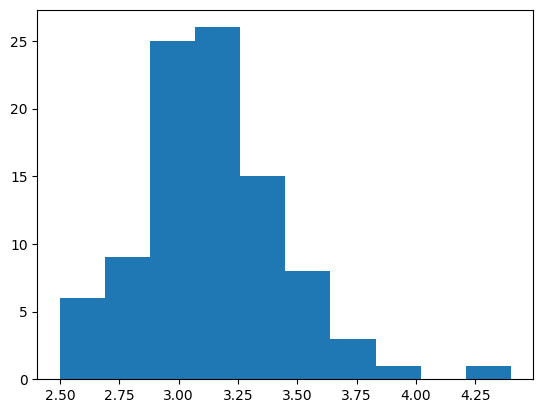

In [49]:
plt.hist(df_healthy.Mean_cluster_size)
plt.show()

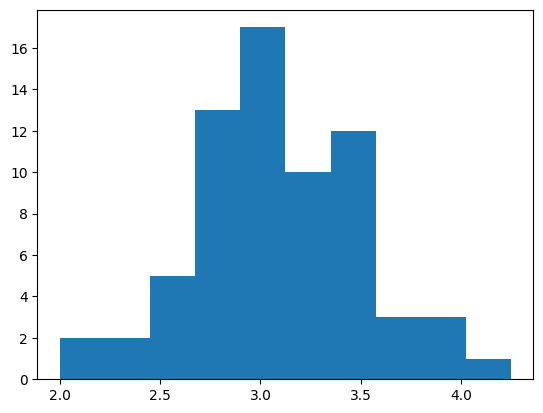

In [50]:
plt.hist(df_aphasia.Mean_cluster_size)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [51]:
t_test, p = ttest_ind(df_healthy.Mean_cluster_size, df_aphasia.Mean_cluster_size)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 1.072319555088662, p-value: 0.285191245908281


In [52]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Same distributions (H0)


кол-во свитчей

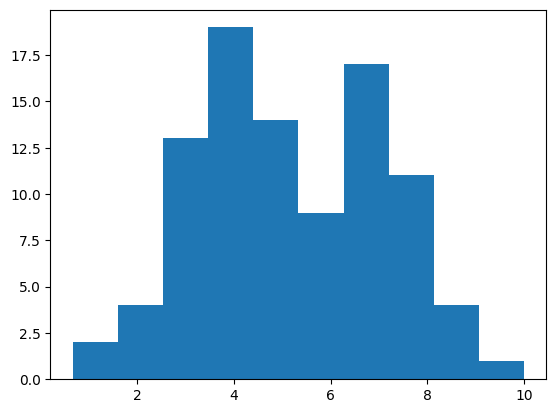

In [28]:
plt.hist(df_healthy.Avg_switch_number)
plt.show()

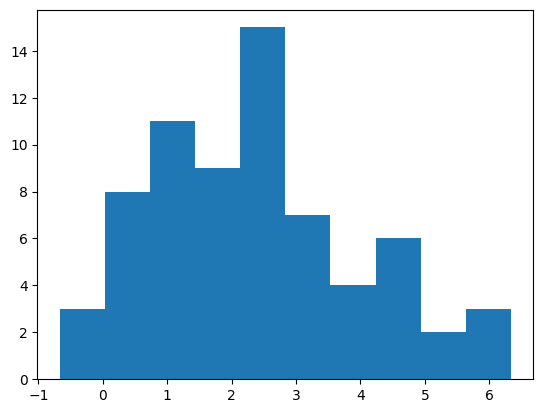

In [29]:
plt.hist(df_aphasia.Avg_switch_number)
plt.show()

In [ ]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [30]:
t_test, p = ttest_ind(df_healthy.Avg_switch_number, df_aphasia.Avg_switch_number)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 10.17586404392428, p-value: 4.5583124566748045e-19


In [31]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


t-score

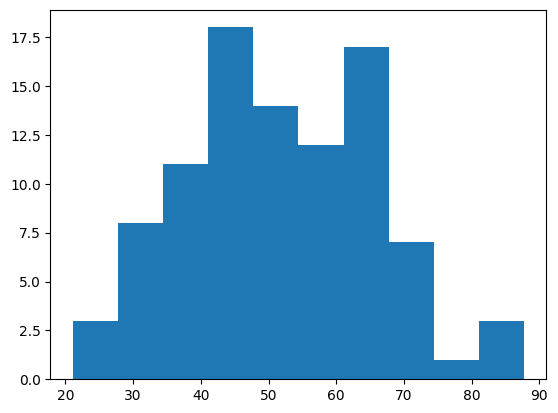

In [32]:
plt.hist(df_healthy.Average_cluster_t_score)
plt.show()

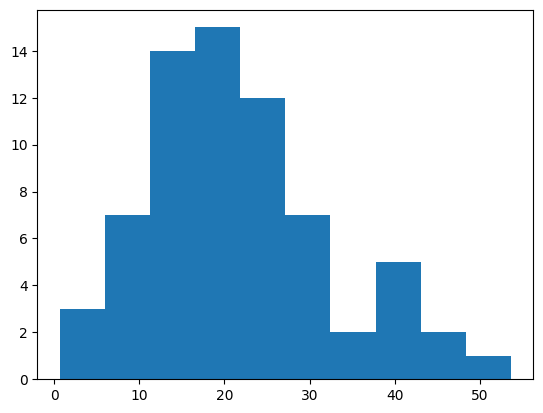

In [33]:
plt.hist(df_aphasia.Average_cluster_t_score)
plt.show()

In [34]:
# распределения нормальные (близки к нормальным), поэтому берём t-критерий Стьюдента
# H0 - средние выборок равны

In [37]:
t_test, p = ttest_ind(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {t_test}, p-value: {p}')

statistic: 14.507723707344793, p-value: 5.609725990995729e-31


In [38]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


silhouette-score

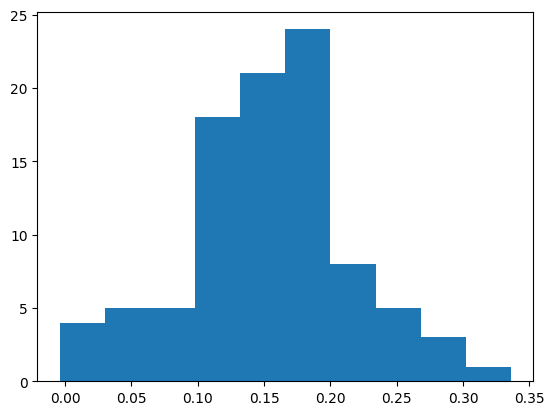

In [39]:
plt.hist(df_healthy.Average_silhouette_score)
plt.show()

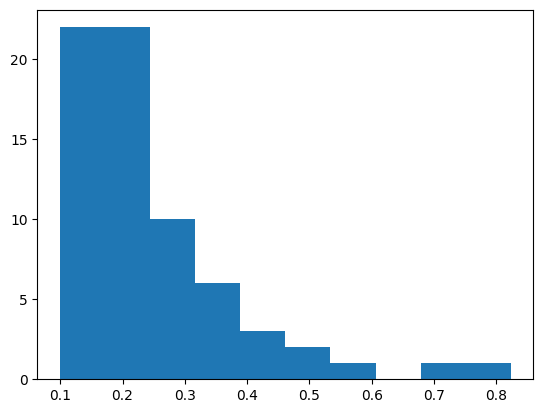

In [40]:
plt.hist(df_aphasia.Average_silhouette_score)
plt.show()

In [ ]:
# распределения разные, поэтому берём критерий U-Манна Уитни
# H0 - выборки взяты из одного и того же распределения

In [42]:
u_test, p = mannwhitneyu(df_healthy.Average_cluster_t_score, df_aphasia.Average_cluster_t_score)
print(f'statistic: {u_test}, p-value: {p}')

statistic: 6088.0, p-value: 9.898488587458599e-23


In [43]:
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


### отличия метрик по категории "профессии"

t-score - проверяем попарно между всеми категориями

In [46]:
# между категориями "города" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 1.7613288740905845e-11
Different distributions (reject H0)


In [47]:
# между категориями "профессии" и "животные"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_animals, df_healthy.Mean_cluster_t_score_professions)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.2538163712931107e-28
Different distributions (reject H0)


In [48]:
# между категориями "города" и "профессии"
t_test, p = ttest_rel(df_healthy.Mean_cluster_t_score_professions, df_healthy.Mean_cluster_t_score_cities)
print(f'statistic: {u_test}, p-value: {p}')
alpha = 0.05
if p > alpha:
    print('Same distributions (H0)')
else:
    print('Different distributions (reject H0)')

statistic: 6088.0, p-value: 2.6750776286951394e-14
Different distributions (reject H0)
